<a href="https://colab.research.google.com/github/JayedTamim/Thesis_model/blob/main/predict_covid_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('qt_dataset.csv',encoding='latin1')

In [3]:
df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


In [4]:
df.shape

(10000, 5)

In [5]:
df.set_index('ID',inplace=True)

In [6]:
df.tail()

,Oxygen,PulseRate,Temperature,Result
ID,,,,
9995,95,124,97,Negative
9996,88,70,100,Positive
9997,99,56,105,Negative
9998,92,49,98,Positive
9999,85,52,99,Positive


In [7]:
df.isna().sum()

Oxygen         0
PulseRate      0
Temperature    0
Result         0
dtype: int64

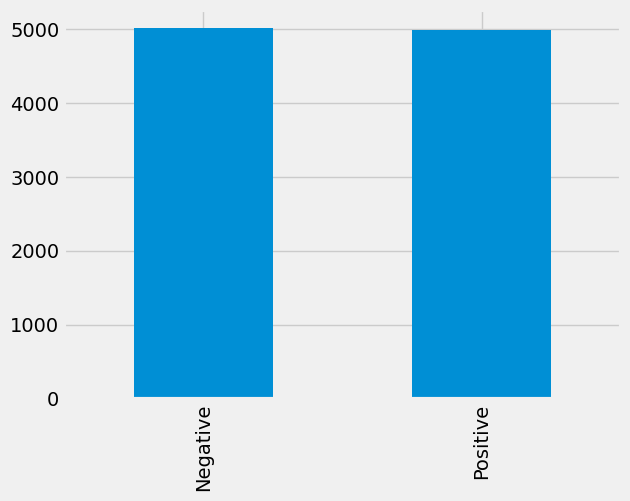

In [8]:
plt.style.use('fivethirtyeight')
df['Result'].value_counts().plot(kind='bar')
plt.show()

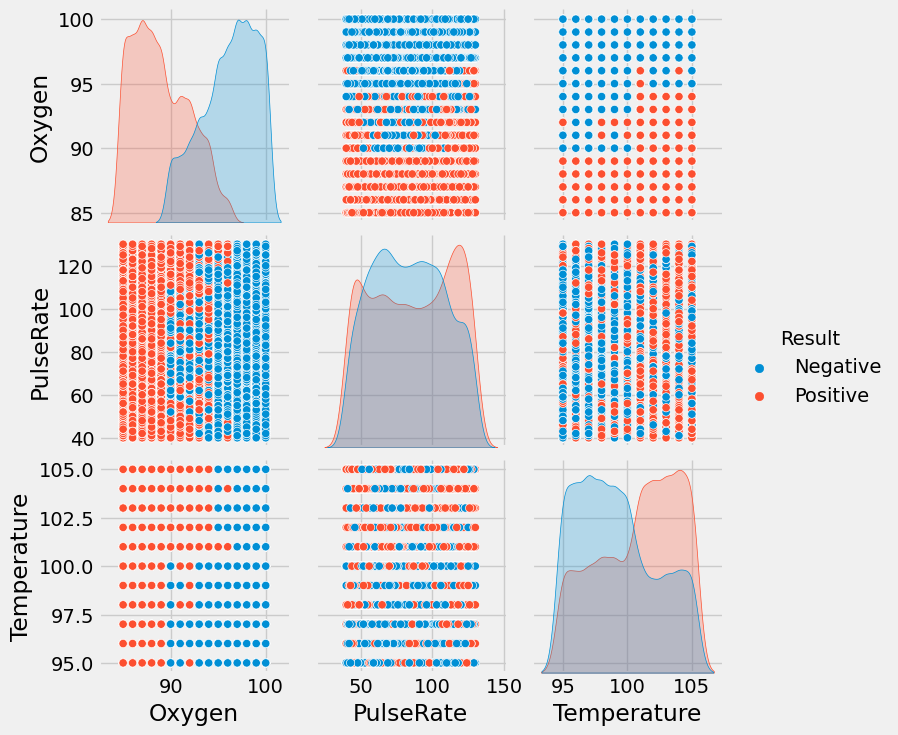

In [9]:
plt.style.use('fivethirtyeight')
sns.pairplot(data=df,hue='Result')
plt.show()

In [10]:
df['Result'].replace(['Positive','Negative'],[1,0],inplace=True)

In [11]:
df['Result'].unique()

array([0, 1])

In [12]:
x = df.drop('Result',axis=1)
y = df['Result']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [14]:
x_train.shape

(7000, 3)

In [15]:
x_test.shape

(3000, 3)

In [16]:
y_train.shape

(7000,)

In [17]:
y_test.shape

(3000,)

In [18]:
#We choose kernel='rbf'
model = SVC()
model.fit(x_train,y_train)

SVC()

In [19]:
model.score(x_test,y_test)

0.9406666666666667

In [20]:
model.score(x_train,y_train)

0.9444285714285714

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred_train = model.predict(x_train)

In [23]:
test = confusion_matrix(y_pred,y_test)

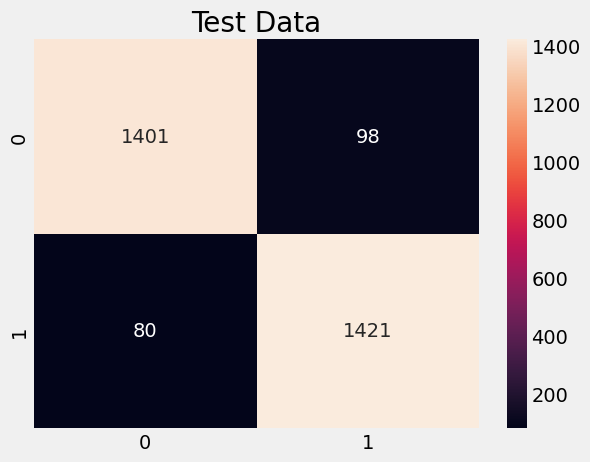

In [24]:
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

In [25]:
train = confusion_matrix(y_pred_train,y_train)

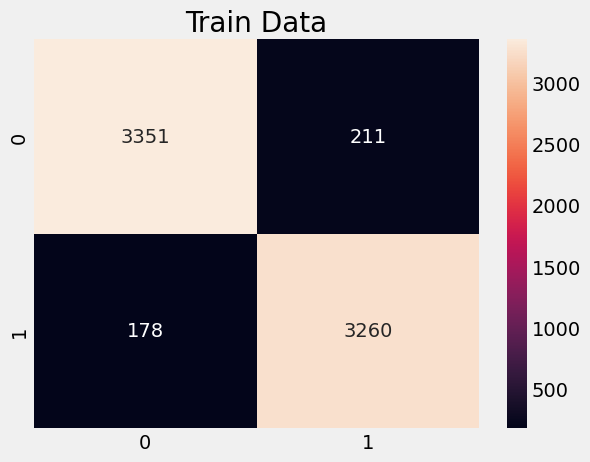

In [26]:
plt.title('Train Data')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()

## **Lets Improve the data accuracy**

In [27]:
model2 = SVC(C=5,gamma='auto')
model2.fit(x_train,y_train)

SVC(C=5, gamma='auto')

In [28]:
print('Test Accuracy:',model2.score(x_test,y_test))
print('Train Accuracy:',model2.score(x_train,y_train))

Test Accuracy: 0.998
Train Accuracy: 1.0


In [29]:
y_pred_train2 = model2.predict(x_train)
y_pred2 = model2.predict(x_test)

In [30]:
test2 = confusion_matrix(y_pred2,y_test)

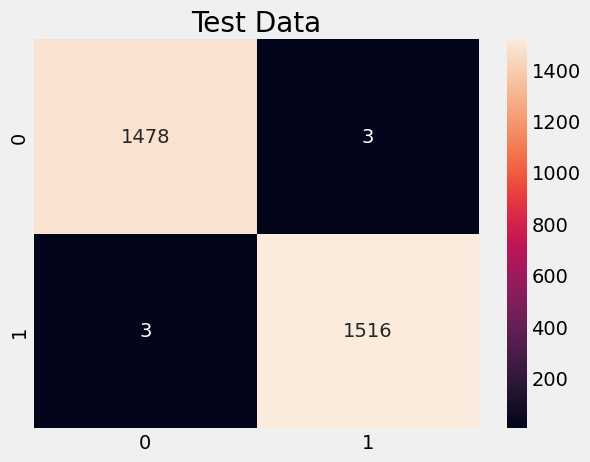

In [31]:
plt.title('Test Data')
sns.heatmap(data=test2,annot=True,fmt='g')
plt.show()

In [32]:
train2 = confusion_matrix(y_pred_train2,y_train)

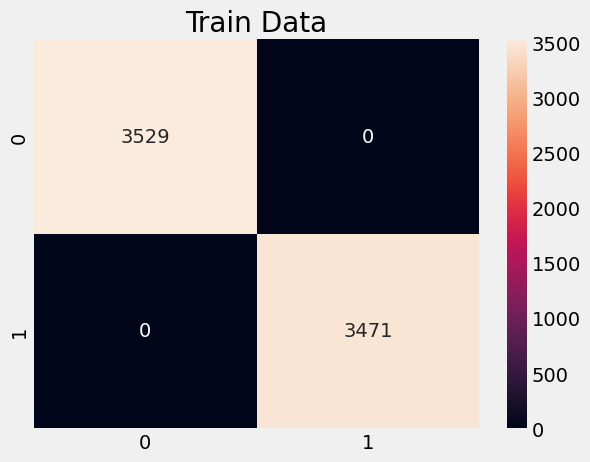

In [33]:
plt.title('Train Data')
sns.heatmap(data=train2,annot=True,fmt='g')
plt.show()